In [20]:
# Import necessary libraries
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# Create a directory for saving plots
def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to generate datasets
def generate_datasets():
    datasets = {
        "moons": make_moons(n_samples=300, noise=0.05, random_state=16),
        "blobs": make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=16),
        "circles": make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=16)
    }
    return datasets

# Function to perform clustering
def perform_clustering(X, algorithm, **kwargs):
    if algorithm == 'DBSCAN':
        model = DBSCAN(**kwargs)
    elif algorithm == 'k-Means':
        model = KMeans(**kwargs)
    elif algorithm == 'Hierarchical':
        model = AgglomerativeClustering(**kwargs)
    else:
        raise ValueError("Unsupported algorithm")

    clusters = model.fit_predict(X)
    return clusters

# Function to visualize clusters and save plots
def plot_clusters(X, clusters, title, filename):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.savefig(filename, dpi=300)
    plt.show()

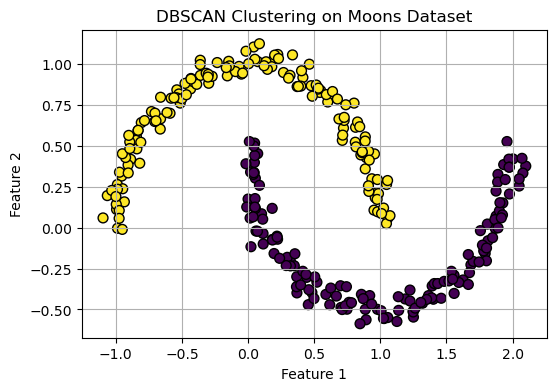

d:\Desktop\BINF5507\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


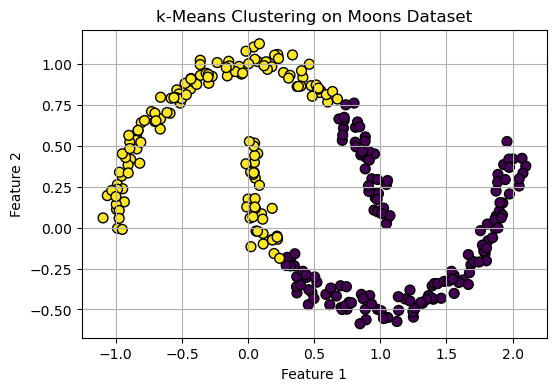

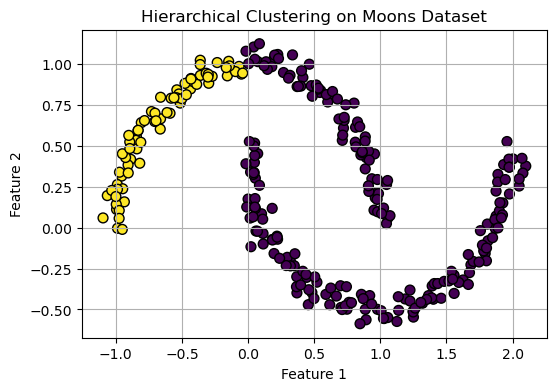

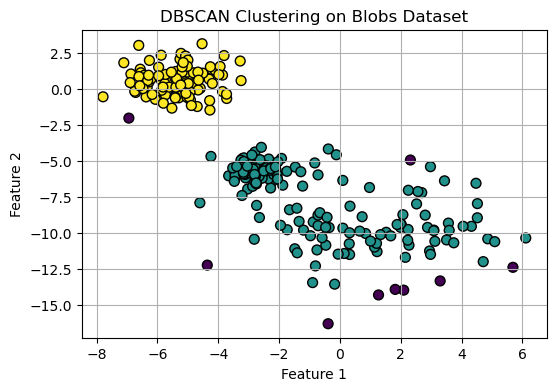

d:\Desktop\BINF5507\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


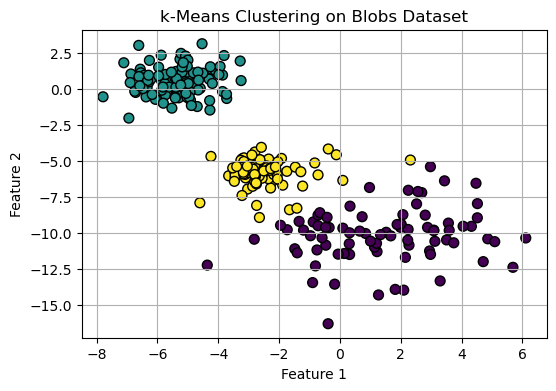

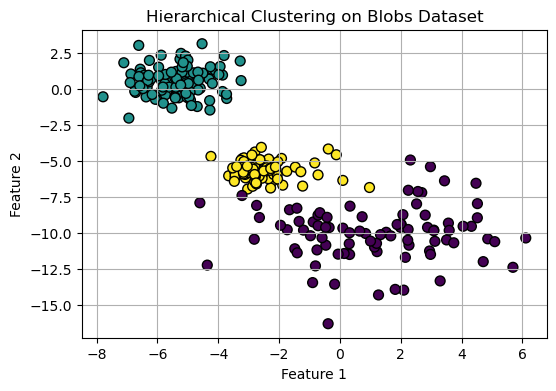

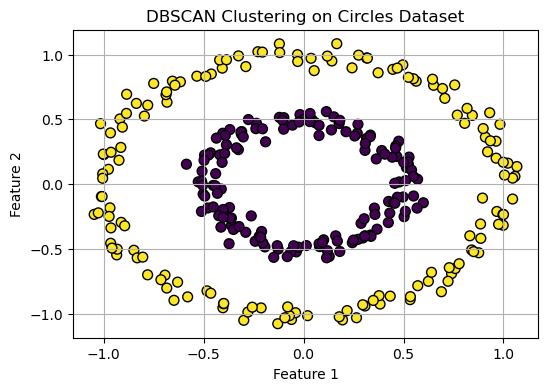

d:\Desktop\BINF5507\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


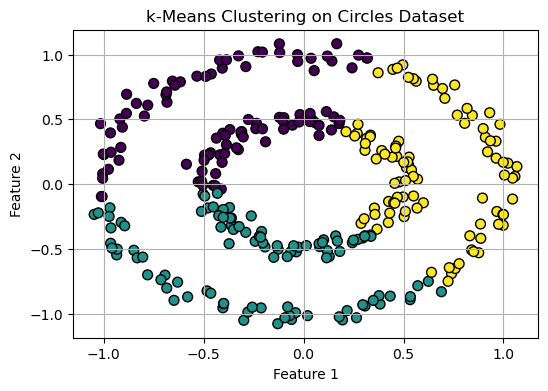

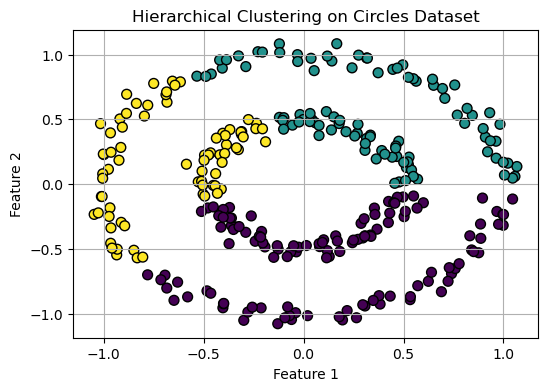

In [21]:
# Main execution
def main():
    os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # Fix loky warning that appears sometimes
    os.environ["OMP_NUM_THREADS"] = "2"  # Fix KMeans memory leak warning (warning still appears for some reason? need to check)
    
    save_dir = "Result Plots"
    ensure_directory(save_dir)
    
    datasets = generate_datasets()

    clustering_algorithms = {
        'DBSCAN': {'eps': 0.2, 'min_samples': 5},
        'k-Means': {'n_clusters': 2},
        'Hierarchical': {'n_clusters': 2}
    }

    # Test on moons dataset (DBSCAN excels here)
    X_moons, _ = datasets['moons']
    for algo, params in clustering_algorithms.items():
        clusters = perform_clustering(X_moons, algo, **params)
        plot_clusters(X_moons, clusters, f"{algo} Clustering on Moons Dataset", f"{save_dir}/{algo}_moons.png")

    # Adjusting params for blobs dataset
    clustering_algorithms['k-Means']['n_clusters'] = 3
    clustering_algorithms['Hierarchical']['n_clusters'] = 3
    clustering_algorithms['DBSCAN'] = {'eps': 1.5, 'min_samples': 5}

    # Test on blobs dataset (DBSCAN struggles here)
    X_blobs, _ = datasets['blobs']
    for algo, params in clustering_algorithms.items():
        clusters = perform_clustering(X_blobs, algo, **params)
        plot_clusters(X_blobs, clusters, f"{algo} Clustering on Blobs Dataset", f"{save_dir}/{algo}_blobs.png")
    
    # Test on circles dataset (DBSCAN handles non-linearly separable data well)
    clustering_algorithms['DBSCAN'] = {'eps': 0.2, 'min_samples': 5}
    X_circles, _ = datasets['circles']
    for algo, params in clustering_algorithms.items():
        clusters = perform_clustering(X_circles, algo, **params)
        plot_clusters(X_circles, clusters, f"{algo} Clustering on Circles Dataset", f"{save_dir}/{algo}_circles.png")

# Run main
if __name__ == "__main__":
    main()